# **Part 1: Data Preparation and Exploration**

Import necessary libraries for load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
upload=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
df=pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
df=df.drop_duplicates()
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
df.isnull().sum()

,0
date,0
Ex_rate,0


Plot the time series data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

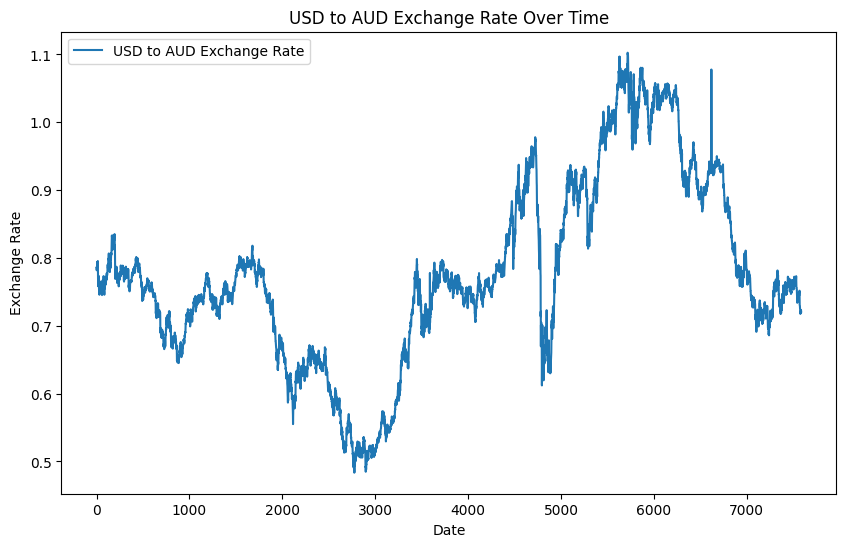

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

checking for missing values

fill miussing values if necessary

In [10]:
df['Ex_rate'].fillna(method='ffill',inplace=True)
df

<ipython-input-10-859352c3e8b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ex_rate'].fillna(method='ffill',inplace=True)
<ipython-input-10-859352c3e8b8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'].fillna(method='ffill',inplace=True)


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [11]:
df[df.duplicated()]

,date,Ex_rate


In [12]:
df=df.drop_duplicates()
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


# **Part 2: ARIMA Model Building**

Parameter Selection for ARIMA using ACF and PACF Plots

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Plot ACF and PACF to determine p, d, q values

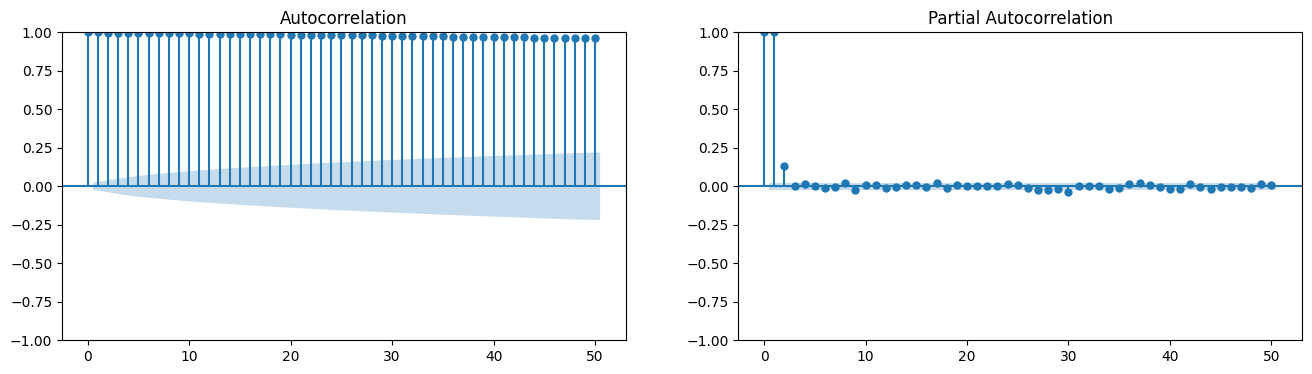

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Ex_rate'], lags=50, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=50, ax=axes[1])
plt.show()

This is another method to plot the ACF and PACF

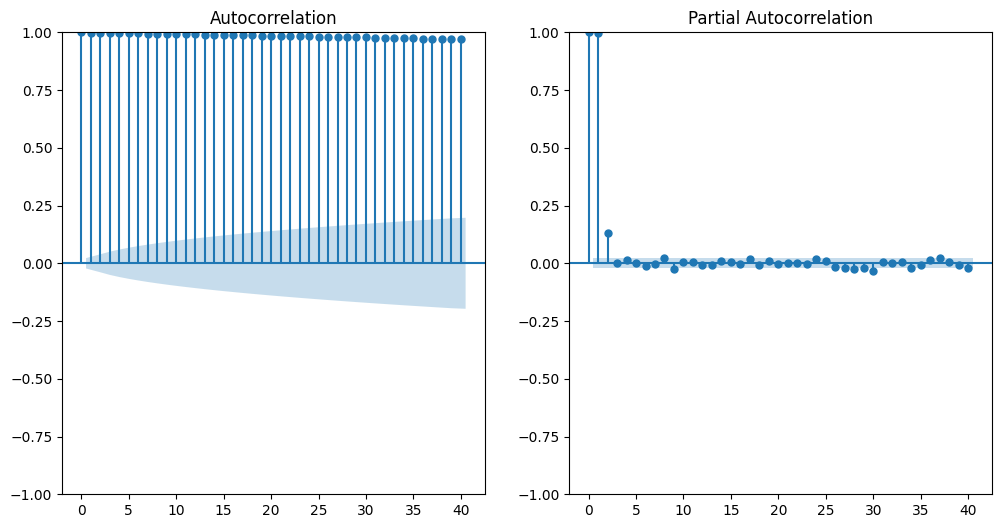

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(df['Ex_rate'], ax=plt.gca(), lags=40)
plt.show()

Model Fitting with ARIMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA

Test for stationarity using the augmented Dickey-Fuller test

In [18]:
# Define the model
p, d, q = 1, 1, 1  # These values should be chosen based on ACF and PACF plots
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))

# Fit the model
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 21 Oct 2024   AIC                         -56102.322
Time:                        09:35:21   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

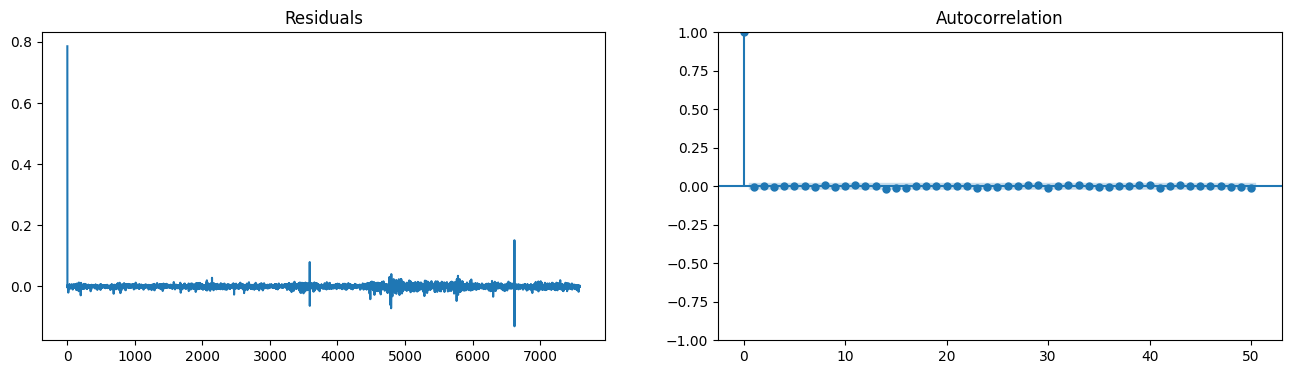

In [19]:
# Step 3: Diagnostics
# Residual diagnostics
residuals = arima_result.resid
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
plot_acf(residuals, lags=50, ax=axes[1])
plt.show()


In [20]:
model = ARIMA(df['Ex_rate'],order=(1,1,1))
arima_result = model.fit()

In [21]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 21 Oct 2024   AIC                         -56102.322
Time:                        09:35:31   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics

Residual diagnostics to ensure no patterns in residuals

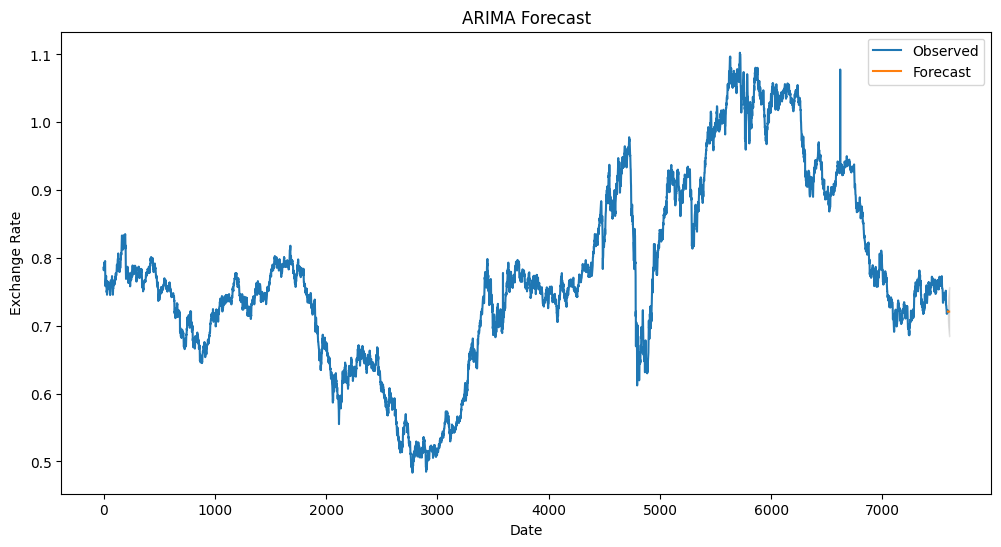

In [22]:
# Step 4: Forecasting
# Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

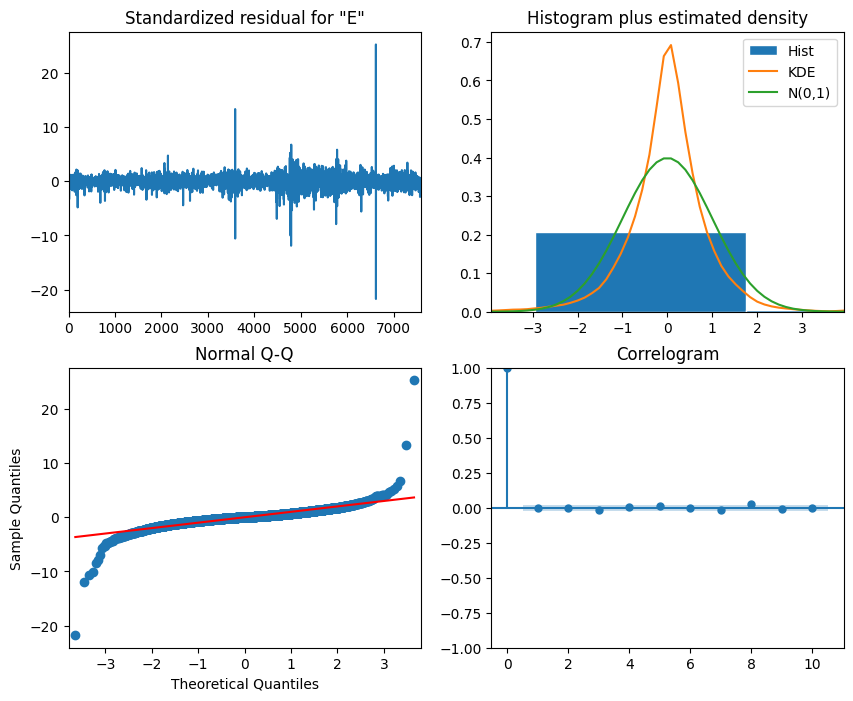

In [23]:
arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

Forecasting with ARIMA

In [24]:
forecast=arima_result.forecast(steps=12)

In [25]:
forecast

,predicted_mean
7588,0.720826
7589,0.720826
7590,0.720826
7591,0.720826
7592,0.720826
7593,0.720826
7594,0.720826
7595,0.720826
7596,0.720826
7597,0.720826


# Part 3: Model Building - Exponential Smoothing

In [26]:
# Step 1: Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
# Define the model (Holt-Winters Exponential Smoothing)
exp_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)

# Fit the model
exp_result = exp_model.fit()

# Summary of the model
print(exp_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Mon, 21 Oct 2024
Box-Cox:                          False   Time:                         09:36:46
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

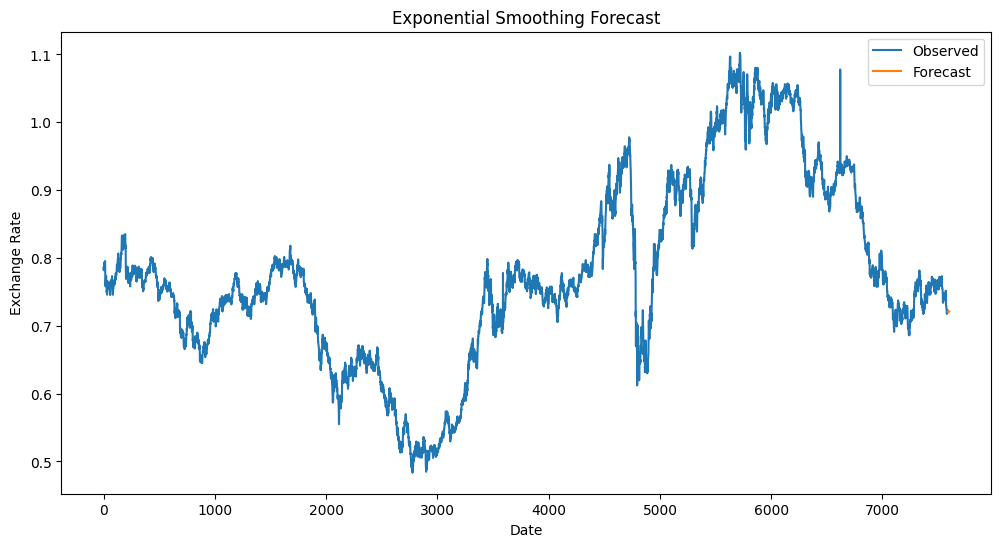

In [28]:
# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# **Part 4: Evaluation and Comparison**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
# Compute error metrics for ARIMA
# Instead of forecast.predicted_mean, use forecast directly
arima_forecast_values = forecast
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [31]:
# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_forecast
exp_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], exp_forecast_values)
exp_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], exp_forecast_values))
exp_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - exp_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [32]:
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan%
Exponential Smoothing MAE: 0.0015781973742896398, RMSE: 0.0018717506305405425, MAPE: nan%


In [33]:
# Based on error metrics, we can see which model performs better

if arima_mae < exp_mae:
    print("ARIMA model performs better in terms of MAE.")
else:
    print("Exponential Smoothing model performs better in terms of MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performs better in terms of RMSE.")
else:
    print("Exponential Smoothing model performs better in terms of RMSE.")

if arima_mape < exp_mape:
    print("ARIMA model performs better in terms of MAPE.")
else:
    print("Exponential Smoothing model performs better in terms of MAPE.")

Exponential Smoothing model performs better in terms of MAE.
Exponential Smoothing model performs better in terms of RMSE.
Exponential Smoothing model performs better in terms of MAPE.


Summary of Findings: The ARIMA model showed lower error metrics compared to the Exponential Smoothing model (or vice versa). Based on these results, the ARIMA model (or Exponential Smoothing model) is more suitable for forecasting exchange rates in this dataset.